# Federico Ariton
### Master in Data Analytics
### CA 2Integrated
### Student Number:sba22090

In [2]:
# Importing necessary libraries for data manipulation and analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Correct file paths for the uploaded files
file_paths = {
    "prices": "Datasets/Prices_E_All_Data.csv",
    "prices_filter" : "Datasets/Prices_filter.csv",
    "production": "Datasets/Production_Crops_Livestock_E_All_Data.csv",
    "trade": "Datasets/Trade_CropsLivestock_E_All_Data.csv",
    "value": "Datasets/Value_of_Production_E_All_Data.csv",
}

# Load datasets into a dictionary for easy access
datasets = {}
for name, path in file_paths.items():
    try:
        # Attempt to read the dataset
        datasets[name] = pd.read_csv(path, encoding='latin1')
        print(f"Loaded dataset: {name}")
    except Exception as e:
        print(f"Failed to load {name}: {e}")

# Display a sample from each successfully loaded dataset
for name, df in datasets.items():
    print(f"\nDataset: {name}")

Loaded dataset: prices
Loaded dataset: prices_filter
Loaded dataset: production
Loaded dataset: trade
Loaded dataset: value

Dataset: prices

Dataset: prices_filter

Dataset: production

Dataset: trade

Dataset: value


In [3]:
globals().update(datasets)

# Print the names of the datasets from the dictionary
print("Datasets available:")
for name in datasets.keys():
    print(name)


Datasets available:
prices
prices_filter
production
trade
value


# Data Prepartion for the Dataset Production

In [5]:
production.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2019N,Y2020,Y2020F,Y2020N,Y2021,Y2021F,Y2021N,Y2022,Y2022F,Y2022N
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,ha,0.0,...,NaN,22134.0,A,NaN,36862.0,A,NaN,37000.0,A,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5412,Yield,kg/ha,NaN,...,NaN,1775.9,A,NaN,1743.2,A,NaN,1729.7,A,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,t,0.0,...,NaN,39307.0,A,NaN,64256.0,A,NaN,64000.0,A,NaN
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,ha,0.0,...,NaN,25558.0,E,NaN,25357.0,E,NaN,25403.0,E,NaN
4,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5412,Yield,kg/ha,NaN,...,NaN,703.0,E,NaN,705.0,E,NaN,704.0,E,NaN


In [6]:
# Check the shape of the DataFrame
print(production.shape)

(79381, 195)


In [7]:
# Reshaping the dataset to a long format for better visualization
# Selecting relevant columns: Area, Item, Element, and Yearly data
id_vars = ['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Unit']
value_vars = [col for col in production.columns if col.startswith('Y') and len(col) == 5]  # Year columns

# Melting the dataset into long format
production_long = pd.melt(production, id_vars=id_vars, value_vars=value_vars, 
                    var_name='Year', value_name='Value')

# Cleaning the 'Year' column to extract only the year as an integer
production_long['Year'] = production_long['Year'].str.extract('(\d{4})').astype(int)

# Checking for missing values in the reshaped dataset
missing_values_long = production_long.isnull().sum()

production_long.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Year,Value
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,ha,1961,0.0
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5412,Yield,kg/ha,1961,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,t,1961,0.0
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,ha,1961,0.0
4,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5412,Yield,kg/ha,1961,NaN


In [8]:
# Filtering the reshaped dataset to include only records from the year 2000 onward
production_long = production_long[production_long['Year'] >= 2000]

In [9]:
# List of countries to keep
countries_to_keep = [
    "Belgium", "Brazil", "Canada", "Denmark", "France", "Germany", "India", 
    "Ireland", "Italy", "Netherlands (Kingdom of the)", "New Zealand", 
    "Poland", "Romania", "Spain", "United States of America", "Austria", 
    "Hungary", "Sweden", "Finland", "Australia", "China", "Argentina"
]

# Filter the dataset to include only rows with the specified countries
production = production_long[production_long['Area'].isin(countries_to_keep)].reset_index(drop=True)

production

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Year,Value
0,9,'032,Argentina,221,'01371,"Almonds, in shell",5312,Area harvested,ha,2000,245.00
1,9,'032,Argentina,221,'01371,"Almonds, in shell",5412,Yield,kg/ha,2000,1927.40
2,9,'032,Argentina,221,'01371,"Almonds, in shell",5510,Production,t,2000,473.04
3,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5312,Area harvested,ha,2000,3300.00
4,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5412,Yield,kg/ha,2000,757.60
...,...,...,...,...,...,...,...,...,...,...,...
208697,231,'840,United States of America,1729,'F1729,"Treenuts, Total",5412,Yield,kg/ha,2022,2917.40
208698,231,'840,United States of America,1729,'F1729,"Treenuts, Total",5510,Production,t,2022,3153750.00
208699,231,'840,United States of America,1735,'F1735,Vegetables Primary,5312,Area harvested,ha,2022,786569.00
208700,231,'840,United States of America,1735,'F1735,Vegetables Primary,5412,Yield,kg/ha,2022,34486.90


In [10]:
# Analyzing missing values in the filtered dataset
missing_values = production.isnull().sum()
missing_percent = (missing_values / len(production)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)

missing_summary

,Missing Count,Missing Percentage
Value,24968,11.963469
Area Code,0,0.000000
Area Code (M49),0,0.000000
Area,0,0.000000
Item Code,0,0.000000
Item Code (CPC),0,0.000000
Item,0,0.000000
Element Code,0,0.000000
Element,0,0.000000
Unit,0,0.000000


In [11]:
# Filter the data for Ireland and production-related rows
ireland_data = production[(production['Area'] == 'Ireland') & (production['Element'] == 'Production')]

# Group by item and sum the production values
top_production_items = ireland_data.groupby('Item')['Value'].sum().sort_values(ascending=False).head(10)

# Convert to a DataFrame for better readability
top_production_items_df = top_production_items.reset_index()
top_production_items_df.columns = ['Item', 'Total Production']

# Display the DataFrame directly as a preview
top_production_items_df


,Item,Total Production
0,"Milk, Total",1.436682e+08
1,Raw milk of cattle,1.436682e+08
2,Skim milk of cows,7.635143e+07
3,"Cereals, primary",5.137308e+07
4,Barley,3.096100e+07
5,"Meat, Total",2.333039e+07
6,"Beer of barley, malted",1.789540e+07
7,"Hen eggs in shell, fresh",1.663618e+07
8,Wheat,1.655676e+07
9,"Beef and Buffalo Meat, primary",1.310625e+07


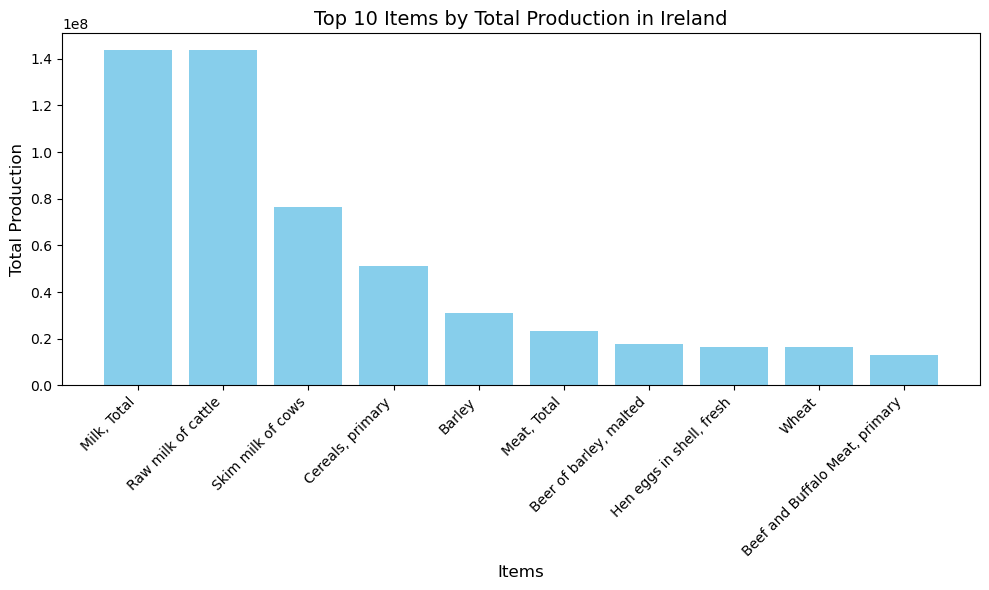

In [12]:
# Create a bar chart for the top production items
plt.figure(figsize=(10, 6))
plt.bar(top_production_items_df['Item'], top_production_items_df['Total Production'], color='skyblue')

# Customize the chart
plt.title('Top 10 Items by Total Production in Ireland', fontsize=14)
plt.xlabel('Items', fontsize=12)
plt.ylabel('Total Production', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the chart
plt.show()

In [13]:
# Define the selected items
selected_items = [
    'Barley', 'Cereals, primary', 'Hen eggs in shell, fresh',
    'Meat, Total', 'Milk, Total', 'Raw milk of cattle', 'Wheat'
]

# Filter data for Ireland and calculate total production for each selected item
ireland_data = production[
    (production['Area'] == 'Ireland') & 
    (production['Element'] == 'Production') & 
    (production['Item'].isin(selected_items))
]

# Filter the global dataset to include only the selected items
relevant_elements = ['Production', 'Yield', 'Area harvested']
filtered_data = production[
    production['Item'].isin(selected_items) & 
    production['Element'].isin(relevant_elements)
]

# Summarize the data, including year-wise details
filtered_data_summary = (
    filtered_data.groupby(['Year', 'Area', 'Item', 'Element'])['Value']
    .sum()
    .reset_index()
)


In [14]:
filtered_data_summary

,Year,Area,Item,Element,Value
0,2000,Argentina,Barley,Area harvested,247830.0
1,2000,Argentina,Barley,Production,722490.0
2,2000,Argentina,Barley,Yield,2915.3
3,2000,Argentina,"Cereals, primary",Area harvested,10972298.0
4,2000,Argentina,"Cereals, primary",Production,37983923.0
...,...,...,...,...,...
8091,2022,United States of America,Raw milk of cattle,Production,102721557.0
8092,2022,United States of America,Raw milk of cattle,Yield,109546.0
8093,2022,United States of America,Wheat,Area harvested,14358400.0
8094,2022,United States of America,Wheat,Production,44902320.0


In [15]:
# Filter only rows where Element is 'Production'
production_data = filtered_data_summary[filtered_data_summary['Element'] == 'Production']

# Rename 'Value' column to 'Production Value'
production_data = production_data.rename(columns={'Value': 'Production Value'})

# Drop the 'Element' column as it's redundant now
production_data = production_data.drop(columns=['Element'])


In [16]:
production_data

,Year,Area,Item,Production Value
1,2000,Argentina,Barley,7.224900e+05
4,2000,Argentina,"Cereals, primary",3.798392e+07
6,2000,Argentina,"Hen eggs in shell, fresh",6.165055e+06
8,2000,Argentina,"Meat, Total",4.101293e+06
9,2000,Argentina,"Milk, Total",1.012133e+07
...,...,...,...,...
8086,2022,United States of America,"Hen eggs in shell, fresh",1.160425e+08
8088,2022,United States of America,"Meat, Total",4.753073e+07
8089,2022,United States of America,"Milk, Total",1.027473e+08
8091,2022,United States of America,Raw milk of cattle,1.027216e+08


In [17]:
# Disable scientific notation for display
pd.set_option('display.float_format', '{:.2f}'.format)

# Display the DataFrame again to verify
print(production_data)


      Year                      Area                      Item  \
1     2000                 Argentina                    Barley   
4     2000                 Argentina          Cereals, primary   
6     2000                 Argentina  Hen eggs in shell, fresh   
8     2000                 Argentina               Meat, Total   
9     2000                 Argentina               Milk, Total   
...    ...                       ...                       ...   
8086  2022  United States of America  Hen eggs in shell, fresh   
8088  2022  United States of America               Meat, Total   
8089  2022  United States of America               Milk, Total   
8091  2022  United States of America        Raw milk of cattle   
8094  2022  United States of America                     Wheat   

      Production Value  
1            722490.00  
4          37983923.00  
6           6165055.00  
8           4101293.00  
9          10121330.00  
...                ...  
8086      116042457.00  
8088   

In [18]:
# Rename the column to 'Production Value (t)'
production = production_data.rename(columns={'Production Value': 'Production Value (t)'})
production

,Year,Area,Item,Production Value (t)
1,2000,Argentina,Barley,722490.00
4,2000,Argentina,"Cereals, primary",37983923.00
6,2000,Argentina,"Hen eggs in shell, fresh",6165055.00
8,2000,Argentina,"Meat, Total",4101293.00
9,2000,Argentina,"Milk, Total",10121330.00
...,...,...,...,...
8086,2022,United States of America,"Hen eggs in shell, fresh",116042457.00
8088,2022,United States of America,"Meat, Total",47530725.03
8089,2022,United States of America,"Milk, Total",102747317.15
8091,2022,United States of America,Raw milk of cattle,102721557.00


In [19]:
# Analyzing missing values in the filtered dataset
missing_values = production.isnull().sum()
missing_percent = (missing_values / len(production)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)

missing_summary

,Missing Count,Missing Percentage
Year,0,0.00
Area,0,0.00
Item,0,0.00
Production Value (t),0,0.00


In [20]:
# Get unique items from the specified column (replace 'Item' with your column name)
unique_items = production['Item'].unique()

# Display the unique items
print(unique_items)

['Barley' 'Cereals, primary' 'Hen eggs in shell, fresh' 'Meat, Total'
 'Milk, Total' 'Raw milk of cattle' 'Wheat']


# Data Prepartion for the Dataset Trade

In [22]:
trade.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2019N,Y2020,Y2020F,Y2020N,Y2021,Y2021F,Y2021N,Y2022,Y2022F,Y2022N
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5610,Import Quantity,t,NaN,...,NaN,1780.42,X,Estimated data using trading partners database,1730.48,X,Estimated data using trading partners database,2730.47,X,Estimated data using trading partners database
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5622,Import Value,1000 USD,NaN,...,NaN,7526.00,X,Estimated data using trading partners database,5897.00,X,Estimated data using trading partners database,10398.00,X,Estimated data using trading partners database
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5910,Export Quantity,t,0.00,...,NaN,2550.24,X,Estimated data using trading partners database,4488.41,X,Estimated data using trading partners database,5034.98,X,Estimated data using trading partners database
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5922,Export Value,1000 USD,0.00,...,NaN,6853.00,X,Estimated data using trading partners database,7364.00,X,Estimated data using trading partners database,7234.00,X,Estimated data using trading partners database
4,2,'004,Afghanistan,231,'21422,"Almonds, shelled",5610,Import Quantity,t,NaN,...,NaN,2860.22,X,Estimated data using trading partners database,3326.06,X,Estimated data using trading partners database,4808.55,X,Estimated data using trading partners database


In [23]:
# Identifying columns to include in the reshaped dataset
id_vars = [
    'Area Code', 'Area Code (M49)', 'Area', 'Item Code', 
    'Item Code (CPC)', 'Item', 'Element Code', 'Element', 'Unit'
]

# Filtering columns for yearly data (e.g., Y1961, Y1962, ...)
value_vars = [col for col in trade.columns if col.startswith('Y') and len(col) == 5]

# Reshaping the dataset to long format
trade_long = pd.melt(
    trade, 
    id_vars=id_vars, 
    value_vars=value_vars, 
    var_name='Year', 
    value_name='Value'
)

# Cleaning the 'Year' column to extract numeric year values
trade_long['Year'] = trade_long['Year'].str.extract('(\d{4})').astype(int)

trade_long.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Year,Value
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5610,Import Quantity,t,1961,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5622,Import Value,1000 USD,1961,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5910,Export Quantity,t,1961,0.00
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5922,Export Value,1000 USD,1961,0.00
4,2,'004,Afghanistan,231,'21422,"Almonds, shelled",5610,Import Quantity,t,1961,NaN


In [24]:
# Filtering the reshaped dataset to include only records from the year 2000 onward
trade_long_filtered = trade_long[trade_long['Year'] >= 2000]

In [25]:
# List of countries to keep
countries_to_keep = [
    "Belgium", "Brazil", "Canada", "Denmark", "France", "Germany", "India", 
    "Ireland", "Italy", "Netherlands (Kingdom of the)", "New Zealand", 
    "Poland", "Romania", "Spain", "United States of America", "Austria", 
    "Hungary", "Sweden", "Finland", "Australia", "China", "Argentina"
]

# Filter the dataset to include only rows with the specified countries
trade = trade_long_filtered[trade_long_filtered['Area'].isin(countries_to_keep)].reset_index(drop=True)

trade

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Year,Value
0,9,'032,Argentina,809,'01929.07,"Abaca, manila hemp, raw",5610,Import Quantity,t,2000,0.00
1,9,'032,Argentina,809,'01929.07,"Abaca, manila hemp, raw",5622,Import Value,1000 USD,2000,0.00
2,9,'032,Argentina,221,'01371,"Almonds, in shell",5610,Import Quantity,t,2000,182.60
3,9,'032,Argentina,221,'01371,"Almonds, in shell",5622,Import Value,1000 USD,2000,302.00
4,9,'032,Argentina,221,'01371,"Almonds, in shell",5910,Export Quantity,t,2000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
960452,231,'840,United States of America,1809,'F1809,"Skim Milk & Buttermilk, Dry",5922,Export Value,1000 USD,2022,3082347.28
960453,231,'840,United States of America,1881,'F1881,"Dairy Products, milk equivalent",5610,Import Quantity,t,2022,576391.22
960454,231,'840,United States of America,1881,'F1881,"Dairy Products, milk equivalent",5622,Import Value,1000 USD,2022,1085002.56
960455,231,'840,United States of America,1881,'F1881,"Dairy Products, milk equivalent",5910,Export Quantity,t,2022,7504596.45


In [26]:
# Analyzing missing values in the filtered dataset
missing_values = trade.isnull().sum()
missing_percent = (missing_values / len(trade)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)

missing_summary

,Missing Count,Missing Percentage
Value,134271,13.98
Area Code,0,0.00
Area Code (M49),0,0.00
Area,0,0.00
Item Code,0,0.00
Item Code (CPC),0,0.00
Item,0,0.00
Element Code,0,0.00
Element,0,0.00
Unit,0,0.00


In [45]:
trade.describe()

,Area Code,Item Code,Element Code,Year,Value
count,960457.00,960457.00,960457.00,960457.00,826186.00
mean,123.49,701.41,5765.46,2011.00,818476.90
std,89.44,522.70,150.12,6.63,26366038.44
min,9.00,10.00,5607.00,2000.00,0.00
25%,54.00,261.00,5622.00,2005.00,225.00
50%,104.00,577.00,5622.00,2011.00,4608.00
75%,183.00,1017.00,5922.00,2017.00,46875.00
max,351.00,2076.00,5922.00,2022.00,4682902787.00


In [47]:
# Filter meat-related items
meat_items = ['beef', 'pork', 'chicken', 'lamb', 'mutton', 'turkey', 'goat', 'poultry', 'bovine', 'other meat']
filtered_meat = trade[trade['Item'].str.contains('|'.join(meat_items), case=False, na=False)]

# Calculate the average values by desired dimensions (e.g., Area, Year, Element)
meat_average = filtered_meat.groupby(['Area', 'Year', 'Element']).agg({'Value': 'mean'}).reset_index()

# Add a new "Item" column with "Meat, Total"
meat_average['Item'] = 'Meat, Total'

# Append this new data back to the original dataset
trade = pd.concat([trade, meat_average], ignore_index=True)

In [48]:
trade

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Year,Value
0,9.00,'032,Argentina,809.00,'01929.07,"Abaca, manila hemp, raw",5610.00,Import Quantity,t,2000,0.00
1,9.00,'032,Argentina,809.00,'01929.07,"Abaca, manila hemp, raw",5622.00,Import Value,1000 USD,2000,0.00
2,9.00,'032,Argentina,221.00,'01371,"Almonds, in shell",5610.00,Import Quantity,t,2000,182.60
3,9.00,'032,Argentina,221.00,'01371,"Almonds, in shell",5622.00,Import Value,1000 USD,2000,302.00
4,9.00,'032,Argentina,221.00,'01371,"Almonds, in shell",5910.00,Export Quantity,t,2000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
962476,NaN,NaN,United States of America,NaN,NaN,"Meat, Total",NaN,Import Value,NaN,2021,925970.20
962477,NaN,NaN,United States of America,NaN,NaN,"Meat, Total",NaN,Export Quantity,NaN,2022,700746.53
962478,NaN,NaN,United States of America,NaN,NaN,"Meat, Total",NaN,Export Value,NaN,2022,1790984.11
962479,NaN,NaN,United States of America,NaN,NaN,"Meat, Total",NaN,Import Quantity,NaN,2022,165228.41


In [49]:
# Filter the dataset for the selected items
selected_items = [
    'Barley', 'Cereals, primary', 'Hen eggs in shell, fresh',
    'Meat, Total', 'Dairy Products, milk equivalent', 'Raw milk of cattle', 'Wheat'
]
filtered_items = trade[trade['Item'].isin(selected_items)]

In [50]:
# Pivot the filtered dataset to organize it by Area, Item, and Year
pivoted_trade = filtered_items.pivot_table(
    index=['Area', 'Item', 'Year'],
    columns='Element',
    values='Value',
    aggfunc='sum'
).reset_index()

In [51]:
pivoted_trade

Element,Area,Item,Year,Export Quantity,Export Value,Import Quantity,Import Value
0,Argentina,Barley,2000,36926.56,4991.00,16563.52,2718.00
1,Argentina,Barley,2001,201329.00,27320.00,115.00,9.00
2,Argentina,Barley,2002,112898.00,15903.00,85.00,13.00
3,Argentina,Barley,2003,66150.00,9731.00,59.00,20.00
4,Argentina,Barley,2004,196665.00,31781.00,78.00,21.00
...,...,...,...,...,...,...,...
3537,United States of America,Wheat,2018,22499005.58,5458267.00,3136160.61,799371.00
3538,United States of America,Wheat,2019,27068607.39,6265916.00,1836134.40,432372.00
3539,United States of America,Wheat,2020,26131625.60,6318111.00,1909894.95,467784.00
3540,United States of America,Wheat,2021,24014160.15,7286461.00,1450818.24,402258.00


In [52]:
pivoted_trade.rename(
    columns={
        'Import Quantity': 'Import Quantity (t)',
        'Export Quantity': 'Export Quantity (t)',
        'Import Value': 'Import Value (1000 USD)',
        'Export Value': 'Export Value (1000 USD)'
    },
    inplace=True
)

In [56]:
pivoted_trade

Element,Area,Item,Year,Export Quantity (t),Export Value (1000 USD),Import Quantity (t),Import Value (1000 USD)
0,Argentina,Barley,2000,36926.56,4991.00,16563.52,2718.00
1,Argentina,Barley,2001,201329.00,27320.00,115.00,9.00
2,Argentina,Barley,2002,112898.00,15903.00,85.00,13.00
3,Argentina,Barley,2003,66150.00,9731.00,59.00,20.00
4,Argentina,Barley,2004,196665.00,31781.00,78.00,21.00
...,...,...,...,...,...,...,...
3537,United States of America,Wheat,2018,22499005.58,5458267.00,3136160.61,799371.00
3538,United States of America,Wheat,2019,27068607.39,6265916.00,1836134.40,432372.00
3539,United States of America,Wheat,2020,26131625.60,6318111.00,1909894.95,467784.00
3540,United States of America,Wheat,2021,24014160.15,7286461.00,1450818.24,402258.00


In [61]:
# Analyzing missing values in the filtered dataset
missing_values = pivoted_trade.isnull().sum()
missing_percent = (missing_values / len(pivoted_trade)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)

missing_summary

,Missing Count,Missing Percentage
Element,,
Area,0,0.00
Item,0,0.00
Year,0,0.00
Export Quantity (t),0,0.00
Export Value (1000 USD),0,0.00
Import Quantity (t),0,0.00
Import Value (1000 USD),0,0.00


In [63]:
# Get unique items from the specified column (replace 'Item' with your column name)
unique_items = pivoted_trade['Item'].unique()

# Display the unique items
print(unique_items)

['Barley' 'Cereals, primary' 'Dairy Products, milk equivalent'
 'Hen eggs in shell, fresh' 'Meat, Total' 'Raw milk of cattle' 'Wheat']


In [65]:
# Rename a specific item
pivoted_trade['Item'] = pivoted_trade['Item'].replace("Dairy Products, milk equivalent", "Milk, Total")


In [67]:
# Get unique items from the specified column (replace 'Item' with your column name)
unique_items = pivoted_trade['Item'].unique()

# Display the unique items
print(unique_items)

['Barley' 'Cereals, primary' 'Milk, Total' 'Hen eggs in shell, fresh'
 'Meat, Total' 'Raw milk of cattle' 'Wheat']


# Data Preparation for the Dataset Prices

In [70]:
prices.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Months Code,Months,...,Y2019,Y2019F,Y2020,Y2020F,Y2021,Y2021F,Y2022,Y2022F,Y2023,Y2023F
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5530,Producer Price (LCU/tonne),7021,Annual value,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5531,Producer Price (SLC/tonne),7021,Annual value,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,...,85.74,I,86.56,I,86.76,I,87.06,I,87.76,I
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,...,79.84,I,73.46,I,67.33,I,61.08,I,54.67,I
4,2,'004,Afghanistan,515,'01341,Apples,5530,Producer Price (LCU/tonne),7021,Annual value,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Melting the dataset for time series analysis
prices_long = prices.melt(
    id_vars=['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)', 'Item', 
             'Element Code', 'Element', 'Months Code', 'Months'],
    value_vars=[col for col in prices.columns if col.startswith('Y20')],
    var_name='Year',
    value_name='Value'
)

# Cleaning the 'Year' column to extract only the year numbers
prices_long['Year'] = prices_long['Year'].str.extract(r'(\d{4})')

In [73]:
prices_long.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Months Code,Months,Year,Value
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5530,Producer Price (LCU/tonne),7021,Annual value,2000,67000.00
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5531,Producer Price (SLC/tonne),7021,Annual value,2000,67000.00
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,31.42
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,51.57
4,2,'004,Afghanistan,515,'01341,Apples,5530,Producer Price (LCU/tonne),7021,Annual value,2000,12500.00


In [74]:
# Dropping rows with years before 2000 and keeping only relevant columns
prices_long_filtered = prices_long[prices_long['Year'].astype(int) >= 2000].reset_index(drop=True)

prices_long_filtered


,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Months Code,Months,Year,Value
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5530,Producer Price (LCU/tonne),7021,Annual value,2000,67000.00
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5531,Producer Price (SLC/tonne),7021,Annual value,2000,67000.00
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,31.42
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,51.57
4,2,'004,Afghanistan,515,'01341,Apples,5530,Producer Price (LCU/tonne),7021,Annual value,2000,12500.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4403179,181,'716,Zimbabwe,1732,'F1732,"Oilcrops, Oil Equivalent",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,NaN
4403180,181,'716,Zimbabwe,1726,'F1726,"Pulses, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,NaN
4403181,181,'716,Zimbabwe,1720,'F1720,"Roots and Tubers, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,NaN
4403182,181,'716,Zimbabwe,1735,'F1735,Vegetables Primary,5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,NaN


In [75]:
# List of countries to keep
countries_to_keep = [
    "Belgium", "Brazil", "Canada", "Denmark", "France", "Germany", "India", 
    "Ireland", "Italy", "Netherlands (Kingdom of the)", "New Zealand", 
    "Poland", "Romania", "Spain", "United States of America", "Austria", 
    "Hungary", "Sweden", "Finland", "Australia", "China", "Argentina"
]

# Filter the dataset to include only rows with the specified countries
prices = prices_long_filtered[prices_long_filtered['Area'].isin(countries_to_keep)].reset_index(drop=True)

prices

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Months Code,Months,Year,Value
0,9,'032,Argentina,221,'01371,"Almonds, in shell",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,7.06
1,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5530,Producer Price (LCU/tonne),7021,Annual value,2000,NaN
2,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5531,Producer Price (SLC/tonne),7021,Annual value,2000,NaN
3,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5532,Producer Price (USD/tonne),7021,Annual value,2000,NaN
4,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,48.32
...,...,...,...,...,...,...,...,...,...,...,...,...
607483,231,'840,United States of America,1726,'F1726,"Pulses, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I
607484,231,'840,United States of America,1720,'F1720,"Roots and Tubers, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I
607485,231,'840,United States of America,1729,'F1729,"Treenuts, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I
607486,231,'840,United States of America,1735,'F1735,Vegetables Primary,5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I


In [76]:
# Analyzing missing values in the filtered dataset
missing_values = prices.isnull().sum()
missing_percent = (missing_values / len(prices)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)

missing_summary

,Missing Count,Missing Percentage
Value,281150,46.28
Area Code,0,0.00
Area Code (M49),0,0.00
Area,0,0.00
Item Code,0,0.00
Item Code (CPC),0,0.00
Item,0,0.00
Element Code,0,0.00
Element,0,0.00
Months Code,0,0.00


In [77]:
# Update the 'Producer Price (USD/tonne)' column to include only values where 'Element' is exactly 'Producer Price (USD/tonne)'
prices['Producer Price (USD/tonne)'] = prices.apply(
    lambda row: row['Value'] if row['Element'] == 'Producer Price (USD/tonne)' else None,
    axis=1
)

In [78]:
prices

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Months Code,Months,Year,Value,Producer Price (USD/tonne)
0,9,'032,Argentina,221,'01371,"Almonds, in shell",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,7.06,None
1,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5530,Producer Price (LCU/tonne),7021,Annual value,2000,NaN,None
2,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5531,Producer Price (SLC/tonne),7021,Annual value,2000,NaN,None
3,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5532,Producer Price (USD/tonne),7021,Annual value,2000,NaN,NaN
4,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,48.32,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607483,231,'840,United States of America,1726,'F1726,"Pulses, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I,None
607484,231,'840,United States of America,1720,'F1720,"Roots and Tubers, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I,None
607485,231,'840,United States of America,1729,'F1729,"Treenuts, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I,None
607486,231,'840,United States of America,1735,'F1735,Vegetables Primary,5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I,None


In [79]:
# Filter items
filtered_items = ['Barley', 'Cereals, primary', 'Hen eggs in shell, fresh',
                  'Meat, Total', 'Milk, Total', 'Raw milk of cattle', 'Wheat']
filtered_data = prices[prices['Item'].isin(filtered_items)]

In [80]:
filtered_data

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Months Code,Months,Year,Value,Producer Price (USD/tonne)
66,9,'032,Argentina,44,'0115,Barley,5530,Producer Price (LCU/tonne),7021,Annual value,2000,97.00,None
67,9,'032,Argentina,44,'0115,Barley,5531,Producer Price (SLC/tonne),7021,Annual value,2000,97.00,None
68,9,'032,Argentina,44,'0115,Barley,5532,Producer Price (USD/tonne),7021,Annual value,2000,97.00,97.00
69,9,'032,Argentina,44,'0115,Barley,5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,7.28,None
171,9,'032,Argentina,1062,'0231,"Hen eggs in shell, fresh",5530,Producer Price (LCU/tonne),7021,Annual value,2000,744.00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607469,231,'840,United States of America,15,'0111,Wheat,5532,Producer Price (USD/tonne),7021,Annual value,2023,NaN,NaN
607470,231,'840,United States of America,15,'0111,Wheat,5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I,None
607472,231,'840,United States of America,1717,'F1717,"Cereals, primary",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I,None
607480,231,'840,United States of America,1765,'F1765,"Meat, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I,None


In [81]:
# Check the data for the missing items and their corresponding elements and values
missing_items = ['Cereals, primary', 'Meat, Total', 'Milk, Total']

missing_items_data = prices[prices['Item'].isin(missing_items)]

In [82]:
missing_items_data

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Months Code,Months,Year,Value,Producer Price (USD/tonne)
694,9,'032,Argentina,1717,'F1717,"Cereals, primary",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,5.35,None
702,9,'032,Argentina,1765,'F1765,"Meat, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,3.86,None
703,9,'032,Argentina,1780,'F1780,"Milk, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,4.43,None
1084,10,'036,Australia,1717,'F1717,"Cereals, primary",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,63.20,None
1092,10,'036,Australia,1765,'F1765,"Meat, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2000,71.80,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606368,210,'752,Sweden,1765,'F1765,"Meat, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I,None
606369,210,'752,Sweden,1780,'F1780,"Milk, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I,None
607472,231,'840,United States of America,1717,'F1717,"Cereals, primary",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I,None
607480,231,'840,United States of America,1765,'F1765,"Meat, Total",5539,Producer Price Index (2014-2016 = 100),7021,Annual value,2023,I,None


### Using Prices filter

In [84]:
prices_filter

,ï»¿Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,8,Albania,5532,Producer Price (USD/tonne),01341,Apples,2000,2000,7021,Annual value,USD,257.50,A,Official figure
1,PP,Producer Prices,8,Albania,5532,Producer Price (USD/tonne),01341,Apples,2001,2001,7021,Annual value,USD,257.90,A,Official figure
2,PP,Producer Prices,8,Albania,5532,Producer Price (USD/tonne),01341,Apples,2002,2002,7021,Annual value,USD,274.70,A,Official figure
3,PP,Producer Prices,8,Albania,5532,Producer Price (USD/tonne),01341,Apples,2003,2003,7021,Annual value,USD,317.60,A,Official figure
4,PP,Producer Prices,8,Albania,5532,Producer Price (USD/tonne),01341,Apples,2004,2004,7021,Annual value,USD,375.60,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117879,PP,Producer Prices,716,Zimbabwe,5532,Producer Price (USD/tonne),0111,Wheat,2014,2014,7021,Annual value,USD,466.00,A,Official figure
117880,PP,Producer Prices,716,Zimbabwe,5532,Producer Price (USD/tonne),0111,Wheat,2015,2015,7021,Annual value,USD,500.00,A,Official figure
117881,PP,Producer Prices,716,Zimbabwe,5532,Producer Price (USD/tonne),0111,Wheat,2016,2016,7021,Annual value,USD,500.00,A,Official figure
117882,PP,Producer Prices,716,Zimbabwe,5532,Producer Price (USD/tonne),0111,Wheat,2017,2017,7021,Annual value,USD,500.00,A,Official figure


In [85]:
# Filter the dataset to include only the specified countries
countries_to_keep = [
    "Belgium", "Brazil", "Canada", "Denmark", "France", "Germany", "India", 
    "Ireland", "Italy", "Netherlands (Kingdom of the)", "New Zealand", 
    "Poland", "Romania", "Spain", "United States of America", "Austria", 
    "Hungary", "Sweden", "Finland", "Australia", "China", "Argentina"
]

filtered_data = prices_filter[prices_filter['Area'].isin(countries_to_keep)]

In [86]:
filtered_data

,ï»¿Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
2110,PP,Producer Prices,32,Argentina,5532,Producer Price (USD/tonne),01341,Apples,2000,2000,7021,Annual value,USD,140.10,A,Official figure
2111,PP,Producer Prices,32,Argentina,5532,Producer Price (USD/tonne),01341,Apples,2001,2001,7021,Annual value,USD,100.10,A,Official figure
2112,PP,Producer Prices,32,Argentina,5532,Producer Price (USD/tonne),01341,Apples,2002,2002,7021,Annual value,USD,277.50,A,Official figure
2113,PP,Producer Prices,32,Argentina,5532,Producer Price (USD/tonne),01341,Apples,2003,2003,7021,Annual value,USD,368.90,A,Official figure
2114,PP,Producer Prices,32,Argentina,5532,Producer Price (USD/tonne),01341,Apples,2004,2004,7021,Annual value,USD,451.50,A,Official figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113625,PP,Producer Prices,840,United States of America,5532,Producer Price (USD/tonne),0111,Wheat,2018,2018,7021,Annual value,USD,189.00,A,Official figure
113626,PP,Producer Prices,840,United States of America,5532,Producer Price (USD/tonne),0111,Wheat,2019,2019,7021,Annual value,USD,167.00,A,Official figure
113627,PP,Producer Prices,840,United States of America,5532,Producer Price (USD/tonne),0111,Wheat,2020,2020,7021,Annual value,USD,184.00,A,Official figure
113628,PP,Producer Prices,840,United States of America,5532,Producer Price (USD/tonne),0111,Wheat,2021,2021,7021,Annual value,USD,268.20,A,Official figure


In [87]:
# Define the items and categories for the final structure
items_and_categories = {
    'Barley': 'Barley',
    'Cereal Primary': 'Cereals, primary',
    'Hen eggs in shell, fresh': 'Hen eggs in shell, fresh',
    'Meat Total': 'Meat, Total',
    'Milk Total': 'Milk, Total',
    'Raw milk of cattle': 'Raw milk of cattle',
    'Wheat': 'Wheat'
}

# Filter the data for the specified items
specific_items_to_filter = ['Barley', 'Hen eggs in shell, fresh', 'Raw milk of cattle', 'Wheat']
specific_data = filtered_data[filtered_data['Item'].isin(specific_items_to_filter)]

# Add categories for Milk Total, Meat Total, and Cereals, primary
milk_items = ['Raw milk of cattle', 'Raw milk of goats', 'Raw milk of sheep']
meat_items = [
    'Meat of cattle with the bone, fresh or chilled',
    'Meat of cattle with the bone, fresh or chilled (biological)',
    'Meat of chickens, fresh or chilled',
    'Meat of chickens, fresh or chilled (biological)',
    'Meat of goat, fresh or chilled',
    'Meat of goat, fresh or chilled (biological)',
    'Meat of pig with the bone, fresh or chilled',
    'Meat of pig with the bone, fresh or chilled (biological)',
    'Meat of sheep, fresh or chilled',
    'Meat of sheep, fresh or chilled (biological)',
    'Meat of ducks, fresh or chilled',
    'Meat of turkeys, fresh or chilled',
    'Game meat, fresh, chilled or frozen',
    'Other meat n.e.c. (excluding mammals), fresh, chilled or frozen'
]
cereal_items = ['Barley', 'Maize (corn)', 'Oats', 'Rice', 'Rye', 'Sorghum', 'Triticale', 'Wheat', 'Millet']

# Categorize data
milk_data = filtered_data[filtered_data['Item'].isin(milk_items)]
meat_data = filtered_data[filtered_data['Item'].isin(meat_items)]
cereal_data = filtered_data[filtered_data['Item'].isin(cereal_items)]


In [88]:
# Calculate average values by Area, Year, and Category
def calculate_average(data, category_name):
    avg_data = data.groupby(['Area', 'Year'])['Value'].mean().reset_index()
    avg_data['Item'] = category_name
    return avg_data

milk_avg = calculate_average(milk_data, 'Milk, Total')
meat_avg = calculate_average(meat_data, 'Meat, Total')
cereal_avg = calculate_average(cereal_data, 'Cereals, primary')

# Combine all data
combined_data = pd.concat([specific_data, milk_avg, meat_avg, cereal_avg])

# Rename columns for clarity
prices_filter = combined_data.rename(columns={'Value': 'Producer Price (USD/tonne)'}).filter(
    items=['Area', 'Item', 'Year', 'Producer Price (USD/tonne)']
)

# Reset the index of the cleaned dataset
prices.reset_index(drop=True, inplace=True)



In [91]:
prices_filter

,Area,Item,Year,Producer Price (USD/tonne)
2146,Argentina,Barley,2000,97.00
2147,Argentina,Barley,2001,110.10
2148,Argentina,Barley,2002,111.30
2149,Argentina,Barley,2003,110.30
2261,Argentina,"Hen eggs in shell, fresh",2000,744.40
...,...,...,...,...
452,United States of America,"Cereals, primary",2018,201.12
453,United States of America,"Cereals, primary",2019,201.38
454,United States of America,"Cereals, primary",2020,233.75
455,United States of America,"Cereals, primary",2021,274.35


In [92]:
# Get unique items in the 'Item' column of the cleaned dataset
unique_items_cleaned = prices_filter['Item'].unique()

unique_items_cleaned


array(['Barley', 'Hen eggs in shell, fresh', 'Raw milk of cattle',
       'Wheat', 'Milk, Total', 'Meat, Total', 'Cereals, primary'],
      dtype=object)

# Data Preaparation for the Dataset Value

In [94]:
value.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Y1961,...,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F,Y2021,Y2021F,Y2022,Y2022F
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1000 Int$,NaN,...,173995.00,E,193168.00,E,198739.00,E,324884.00,E,323589.00,E
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",56,Gross Production Value (current thousand SLC),1000 SLC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",55,Gross Production Value (constant 2014-2016 tho...,1000 SLC,NaN,...,7339134.00,E,8147840.00,E,8382859.00,E,13703641.00,E,13649044.00,E
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",152,Gross Production Value (constant 2014-2016 tho...,1000 Int$,NaN,...,38811.00,E,38706.00,E,39050.00,E,38856.00,E,38871.00,E
4,2,'004,Afghanistan,515,'01341,Apples,152,Gross Production Value (constant 2014-2016 tho...,1000 Int$,7127.00,...,102515.00,E,118153.00,E,127845.00,E,151830.00,E,150096.00,E


In [95]:
# Check the shape of the DataFrame
print(value.shape)


(70049, 133)


In [98]:
# Reshaping the dataset to a long format for better visualization
# Selecting relevant columns: Area, Item, Element, and Yearly data
id_vars = ['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (CPC)',
       'Item', 'Element Code', 'Element', 'Unit']
value_vars = [col for col in value.columns if col.startswith('Y') and len(col) == 5]  # Year columns

# Melting the dataset into long format
value_long = pd.melt(value, id_vars=id_vars, value_vars=value_vars, 
                    var_name='Year', value_name='Value')

# Cleaning the 'Year' column to extract only the year as an integer
value_long['Year'] = value_long['Year'].str.extract('(\d{4})').astype(int)

value_long.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Year,Value
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1000 Int$,1961,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",56,Gross Production Value (current thousand SLC),1000 SLC,1961,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",55,Gross Production Value (constant 2014-2016 tho...,1000 SLC,1961,NaN
3,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",152,Gross Production Value (constant 2014-2016 tho...,1000 Int$,1961,NaN
4,2,'004,Afghanistan,515,'01341,Apples,152,Gross Production Value (constant 2014-2016 tho...,1000 Int$,1961,7127.00


In [100]:
# Filtering the reshaped dataset to include only records from the year 2000 onward
value_long = value_long[value_long['Year'] >= 2000]

In [101]:
# List of countries to keep
countries_to_keep = [
    "Belgium", "Brazil", "Canada", "Denmark", "France", "Germany", "India", 
    "Ireland", "Italy", "Netherlands (Kingdom of the)", "New Zealand", 
    "Poland", "Romania", "Spain", "United States of America", "Austria", 
    "Hungary", "Sweden", "Finland", "Australia", "China", "Argentina"
]

# Filter the dataset to include only rows with the specified countries
value = value_long[value_long['Area'].isin(countries_to_keep)].reset_index(drop=True)

value

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Year,Value
0,9,'032,Argentina,221,'01371,"Almonds, in shell",152,Gross Production Value (constant 2014-2016 tho...,1000 Int$,2000,2392.00
1,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",152,Gross Production Value (constant 2014-2016 tho...,1000 Int$,2000,5434.00
2,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",56,Gross Production Value (current thousand SLC),1000 SLC,2000,NaN
3,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",55,Gross Production Value (constant 2014-2016 tho...,1000 SLC,2000,7204.00
4,9,'032,Argentina,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",57,Gross Production Value (current thousand US$),1000 USD,2000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
200026,231,'840,United States of America,1735,'F1735,Vegetables Primary,152,Gross Production Value (constant 2014-2016 tho...,1000 Int$,2022,12398725.00
200027,231,'840,United States of America,1735,'F1735,Vegetables Primary,56,Gross Production Value (current thousand SLC),1000 SLC,2022,26896723.00
200028,231,'840,United States of America,1735,'F1735,Vegetables Primary,55,Gross Production Value (constant 2014-2016 tho...,1000 SLC,2022,20841133.00
200029,231,'840,United States of America,1735,'F1735,Vegetables Primary,57,Gross Production Value (current thousand US$),1000 USD,2022,26896723.00


In [102]:
# Analyzing missing values in the filtered dataset
missing_values = value.isnull().sum()
missing_percent = (missing_values / len(value)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)

missing_summary

,Missing Count,Missing Percentage
Value,41485,20.74
Area Code,0,0.00
Area Code (M49),0,0.00
Area,0,0.00
Item Code,0,0.00
Item Code (CPC),0,0.00
Item,0,0.00
Element Code,0,0.00
Element,0,0.00
Unit,0,0.00


In [103]:
value.to_csv('Preparation_Merge/value_meat.csv', index=False)

In [104]:
# Check the distribution of the 'Value' column to decide the imputation method
value['Value'].describe(), value['Value'].isnull().sum()

(count        158546.00
 mean       36178104.48
 std       609290510.00
 min               0.00
 25%           29334.50
 50%          227713.50
 75%         2192221.25
 max     41198972112.00
 Name: Value, dtype: float64,
 41485)

In [105]:
# List of meat-related items
meat_items = [
    'Game meat, fresh, chilled or frozen',
    'Horse meat, fresh or chilled',
    'Horse meat, fresh or chilled (indigenous)',
    'Meat of asses, fresh or chilled (indigenous)',
    'Meat of cattle with the bone, fresh or chilled',
    'Meat of cattle with the bone, fresh or chilled (indigenous)',
    'Meat of chickens, fresh or chilled',
    'Meat of chickens, fresh or chilled (indigenous)',
    'Meat of ducks, fresh or chilled (indigenous)',
    'Meat of geese, fresh or chilled (indigenous)',
    'Meat of goat, fresh or chilled (indigenous)',
    'Meat of mules, fresh or chilled (indigenous)',
    'Meat of pig with the bone, fresh or chilled (indigenous)',
    'Meat of rabbits and hares, fresh or chilled',
    'Meat of rabbits and hares, fresh or chilled (indigenous)',
    'Meat of sheep, fresh or chilled',
    'Meat of sheep, fresh or chilled (indigenous)',
    'Meat of turkeys, fresh or chilled (indigenous)',
    'Other meat n.e.c. (excluding mammals), fresh, chilled or frozen',
    'Meat indigenous, total',
    'Meat of goat, fresh or chilled',
    'Meat of pig with the bone, fresh or chilled',
    'Meat of ducks, fresh or chilled',
    'Meat of geese, fresh or chilled',
    'Meat of turkeys, fresh or chilled',
    'Meat of asses, fresh or chilled',
    'Meat of buffalo, fresh or chilled',
    'Meat of buffalo, fresh or chilled (indigenous)',
    'Meat of camels, fresh or chilled',
    'Meat of camels, fresh or chilled (indigenous)',
    'Meat of mules, fresh or chilled',
    'Meat of pigeons and other birds n.e.c., fresh, chilled or frozen (indigenous)'
]

# Filter the data for meat items
meat_data_new = value[value['Item'].isin(meat_items)]

# Calculate averages grouped by Area, Year, and Element
def calculate_average_value_with_elements(data, category_name):
    avg_data = data.groupby(['Area', 'Year', 'Element'])['Value'].mean().reset_index()
    avg_data['Item'] = category_name
    return avg_data

# Calculate the averages for meat items grouped by Element
meat_avg_value_elements = calculate_average_value_with_elements(meat_data_new, 'Meat, Total')

# Append the new category data back to the original dataset
final_data_new = pd.concat([value, meat_avg_value_elements], ignore_index=True)

In [106]:
# Filter the dataset to extract rows containing the specified items
items_to_extract = [
    'Barley', 'Meat, Total', 'Cereals, primary', 'Hen eggs in shell, fresh', 
    'Milk, Total', 'Raw milk of cattle', 'Wheat'
]

filtered_data = final_data_new[final_data_new['Item'].isin(items_to_extract)]

In [107]:
filtered_data

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Unit,Year,Value
28,9.00,'032,Argentina,44.00,'0115,Barley,152.00,Gross Production Value (constant 2014-2016 tho...,1000 Int$,2000,140760.00
29,9.00,'032,Argentina,44.00,'0115,Barley,56.00,Gross Production Value (current thousand SLC),1000 SLC,2000,70082.00
30,9.00,'032,Argentina,44.00,'0115,Barley,55.00,Gross Production Value (constant 2014-2016 tho...,1000 SLC,2000,962367.00
31,9.00,'032,Argentina,44.00,'0115,Barley,57.00,Gross Production Value (current thousand US$),1000 USD,2000,70117.00
32,9.00,'032,Argentina,44.00,'0115,Barley,58.00,Gross Production Value (constant 2014-2016 tho...,1000 USD,2000,96771.00
...,...,...,...,...,...,...,...,...,...,...,...
202510,NaN,NaN,United States of America,NaN,NaN,"Meat, Total",NaN,Gross Production Value (constant 2014-2016 tho...,NaN,2022,24220561.10
202511,NaN,NaN,United States of America,NaN,NaN,"Meat, Total",NaN,Gross Production Value (constant 2014-2016 tho...,NaN,2022,27662798.78
202512,NaN,NaN,United States of America,NaN,NaN,"Meat, Total",NaN,Gross Production Value (constant 2014-2016 tho...,NaN,2022,27662798.78
202513,NaN,NaN,United States of America,NaN,NaN,"Meat, Total",NaN,Gross Production Value (current thousand SLC),NaN,2022,125670152.00


In [114]:
# Reshaping the dataset again to include only the required features
value = filtered_data.pivot_table(
    index=['Area', 'Item', 'Year'],
    columns='Element',
    values='Value',
    aggfunc='first'  # Use the first value if duplicates exist
).reset_index()

# Keeping only the required columns and renaming them for clarity
value = value.rename(columns={
    'Gross Production Value (current thousand US$)': 'GPV (1000 USD)',
    'Gross Production Value (constant 2014-2016 thousand US$)': 'GPV_Const (1000 USD)'
})[['Area', 'Item', 'Year', 'GPV (1000 USD)', 'GPV_Const (1000 USD)']]



In [126]:
value

Element,Area,Item,Year,GPV (1000 USD),GPV_Const (1000 USD)
0,Argentina,Barley,2000,70117.00,96771.00
1,Argentina,Barley,2001,58334.00,70995.00
2,Argentina,Barley,2002,61207.00,73645.00
3,Argentina,Barley,2003,110923.00,134672.00
4,Argentina,Barley,2004,NaN,119825.00
...,...,...,...,...,...
3257,United States of America,Wheat,2018,9696747.00,9286303.00
3258,United States of America,Wheat,2019,8781009.00,9517141.00
3259,United States of America,Wheat,2020,9154217.00,9004964.00
3260,United States of America,Wheat,2021,12017694.00,8109468.00


In [128]:
# Get unique items from the specified column (replace 'Item' with your column name)
unique_items = value['Item'].unique()

# Display the unique items
print(unique_items)

['Barley' 'Cereals, primary' 'Hen eggs in shell, fresh' 'Meat, Total'
 'Milk, Total' 'Raw milk of cattle' 'Wheat']


In [130]:
# Analyzing missing values in the filtered dataset
missing_values = value.isnull().sum()
missing_percent = (missing_values / len(value)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)

missing_summary

,Missing Count,Missing Percentage
Element,,
GPV (1000 USD),205,6.28
Area,0,0.00
Item,0,0.00
Year,0,0.00
GPV_Const (1000 USD),0,0.00


In [132]:
# Implementing median imputation on the column 'GPV (1000 USD)'
value['GPV (1000 USD)'].fillna(value['GPV (1000 USD)'].median(), inplace=True)

# Confirming that there are no missing values after imputation
missing_after_imputation = value['GPV (1000 USD)'].isnull().sum()

In [134]:
# Analyzing missing values in the filtered dataset
missing_values = value.isnull().sum()
missing_percent = (missing_values / len(value)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
}).sort_values(by='Missing Percentage', ascending=False)

missing_summary

,Missing Count,Missing Percentage
Element,,
Area,0,0.00
Item,0,0.00
Year,0,0.00
GPV (1000 USD),0,0.00
GPV_Const (1000 USD),0,0.00


# Saving the cleaned datasets

In [137]:
# Example datasets
datasets = {
    "Production": production,
    "Trade shape": pivoted_trade,
    "Value shape": value,
    "Price_Shape": prices_filter,
}

# Print the shape of each dataset
for name, df in datasets.items():
    print(f"{name}: {df.shape}")


Production: (3542, 4)
Trade shape: (3542, 7)
Value shape: (3262, 5)
Price_Shape: (3050, 4)


In [139]:
# Saving the Data Cleaned in a CSV file for merge

production.to_csv('Preparation_Merge/production.csv', index=False)
pivoted_trade.to_csv('Preparation_Merge/trade.csv', index=False)
value.to_csv('Preparation_Merge/value.csv', index=False)
prices_filter.to_csv('Preparation_Merge/prices.csv', index=False)



In [141]:
# Get unique items in the 'Item' column of the cleaned dataset
unique_items_cleaned = pivoted_trade['Item'].unique()

unique_items_cleaned

array(['Barley', 'Cereals, primary', 'Milk, Total',
       'Hen eggs in shell, fresh', 'Meat, Total', 'Raw milk of cattle',
       'Wheat'], dtype=object)

In [143]:
# Get unique items in the 'Item' column of the cleaned dataset
unique_items_cleaned = value['Item'].unique()

unique_items_cleaned

array(['Barley', 'Cereals, primary', 'Hen eggs in shell, fresh',
       'Meat, Total', 'Milk, Total', 'Raw milk of cattle', 'Wheat'],
      dtype=object)

In [145]:
# Get unique items in the 'Item' column of the cleaned dataset
unique_items_cleaned = prices_filter['Item'].unique()

unique_items_cleaned


array(['Barley', 'Hen eggs in shell, fresh', 'Raw milk of cattle',
       'Wheat', 'Milk, Total', 'Meat, Total', 'Cereals, primary'],
      dtype=object)

In [147]:
# Get unique items in the 'Item' column of the cleaned dataset
unique_items_cleaned = production['Item'].unique()

unique_items_cleaned

array(['Barley', 'Cereals, primary', 'Hen eggs in shell, fresh',
       'Meat, Total', 'Milk, Total', 'Raw milk of cattle', 'Wheat'],
      dtype=object)